In [34]:
import sys
sys.path.append("../../")
from taxcalc import *
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
from matplotlib.transforms import BlendedGenericTransform
%matplotlib inline

In [15]:
CBO_growth = {2013: {'_factor_target': [0.022, 
                                        0.024,
                                        0.024,
                                        0.025,
                                        0.026,
                                        0.023,
                                        0.018,
                                        0.019,
                                        0.021,
                                        0.021,
                                        0.021,
                                        0.02,
                                        0.02,
                                        0.02]
                     }
              }

In [16]:
# Current law baseline
policy_cl = Policy()
behavior_cl = Behavior()
records_cl = Records("../../puf.csv")
calc_cl = Calculator(policy_cl, records_cl, behavior_cl)
calc_cl.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_cl.increment_year()
assert calc_cl.current_year == 2017
calc_cl.calc_all()
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [17]:
# Refundability expansion
policy_t = Policy()
behavior_t = Behavior()
records_t = Records("../../puf.csv")
reform_t = {
    2017: {
        '_ACTC_Income_thd': [0],
        '_II_credit': [[1000, 1000, 1000, 1000, 1000, 1000]],
        '_II_credit_ps': [[75000, 110000, 55000, 75000, 75000, 55000]],
        '_II_credit_prt': [0.05]
    }
}
policy_t.implement_reform(reform_t)
calc_t = Calculator(policy_t, records_t, behavior_t)
calc_t.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_t.increment_year()
assert calc_t.current_year == 2017
calc_t.calc_all()
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [18]:
combined_cl = calc_cl.records._combined * calc_cl.records.s006
combined_t = calc_t.records._combined * calc_t.records.s006

diff = (combined_t - combined_cl).sum()
print diff
print diff / 10**9

-1952005592.27
-1.95200559227


In [19]:
total = (calc_cl.records.c07220 + calc_cl.records.c11070) * calc_cl.records.s006
print total.sum()
print total.sum() / 10**9

50853075302.0
50.853075302


In [20]:
use_ind = [i for i in range(219814) if calc_cl.records.n24[i] == 3 and calc_cl.records.c00100[i] < 250000]
totaltax = sum([calc_cl.records._iitax[i] * calc_cl.records.s006[i] for i in use_ind])
totalinc = sum([calc_cl.records.c00100[i] * calc_cl.records.s006[i] for i in use_ind])
avgRate = totaltax / totalinc
print avgRate
print totaltax / sum(calc_cl.records.s006)

0.0281571258792
61.9893821661


In [ ]:
use_ind = [i for i in range(219814) if calc_t.records.n24[i] == 0 and calc_t.records.c00100[i] < 250000]
totaltax = sum([calc_t.records._iitax[i] * calc_t.records.s006[i] for i in use_ind])
totalinc = sum([calc_t.records.c00100[i] * calc_t.records.s006[i] for i in use_ind])
avgRate = totaltax / totalinc
print avgRate
print totaltax / sum(calc_t.records.s006)

In [30]:
x1 = sum([calc_cl.records.s006[i] for i in range(219814) if (calc_cl.records._combined[i] > calc_t.records._combined[i])])
x2 = sum([calc_cl.records.s006[i] for i in range(219814) if (calc_cl.records._combined[i] > calc_t.records._combined[i]) and 
          (calc_cl.records.c00100[i] < 20000)])
print x2 / x1



0.931492326444


5582812.63809


ValueError: x and y must have same first dimension

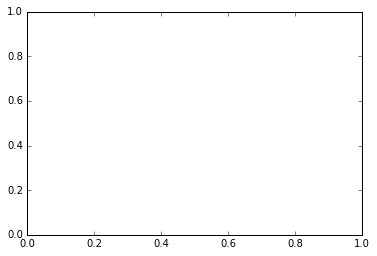

In [35]:
def getMTR(calc, incr, bins):
    calc1 = copy.deepcopy(calc)
    mtrList = [0] * (bins + 1)
    for i in range(bins + 1):
        calc1.records.e00200p[0] = i * incr
        calc1.records.e00200[0] = i * incr
        calc1.calc_all()
        mtrList[i] = calc1.mtr('e00200p')[1]
    return mtrList

mtr_base = getMTR(calc_cl, 10000, 30)
mtr_reform = getMTR(calc_t, 10000, 30)
plt.plot(range(0, 301), mtr_base, label='Current law')
plt.plot(range(0, 301), mtr_reform, label='CTC expansion')
plt.title('Marginal tax rate on wage income')
plt.xlabel('Wage and salary income ($thousands)')

In [38]:
mtr_base[1]

array([ 0.        ,  0.2954022 ,  0.31345536, ..., -0.07106363,
       -0.07106363, -0.07106363])